In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#Numerical Columns
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [7]:
#Catogorical Columns
cat_col=df.select_dtypes(include=['O']).columns
cat_col

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [8]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [9]:
df['Current_year']=2022

In [10]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [11]:
df['years old']=df['Current_year']-df['Year']

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,years old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [13]:
df=df.drop(['Year','Current_year'],axis=1)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

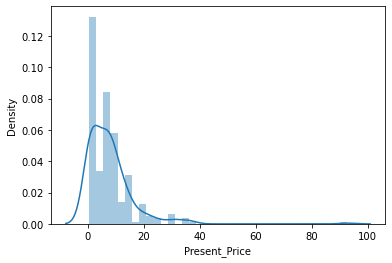

In [56]:
sns.distplot(df['Present_Price'])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

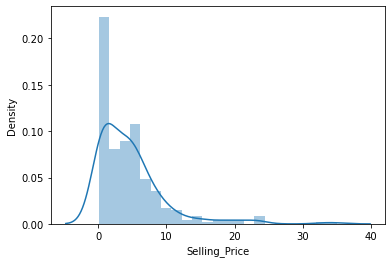

In [15]:
sns.distplot(df['Selling_Price'])

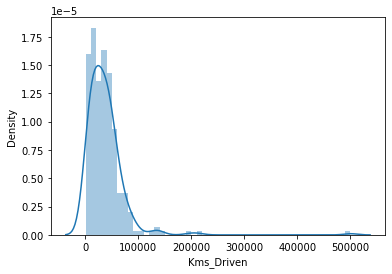

In [16]:
sns.distplot(df['Kms_Driven'],kde=True)
plt.show()

In [17]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [18]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [19]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [20]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [21]:
#one hot encoding
df=pd.get_dummies(data=df,drop_first=True)

In [22]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<AxesSubplot:>

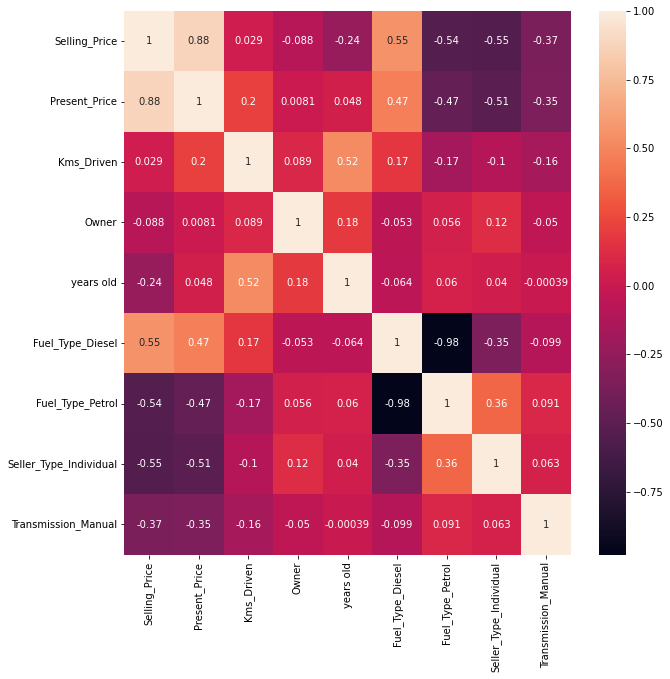

In [23]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Splitting the dataset

In [24]:
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [25]:
X

,Present_Price,Kms_Driven,Owner,years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,6,1,0,0,1
297,5.90,60000,0,7,0,1,0,1
298,11.00,87934,0,13,0,1,0,1
299,12.50,9000,0,5,1,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [27]:
X_train.shape

(240, 8)

In [28]:
X_test.shape

(61, 8)

In [29]:
y_train.shape

(240,)

In [30]:
y_test.shape

(61,)

# Model Building

In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
reg=LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
y_train_pred=reg.predict(X_train)
y_test_pred=reg.predict(X_test)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
def metrics(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
    print("R2 Score:{} |RSME Score:{}".format(round(r2,2),round(RMSE,2)))

In [37]:
print("LR Train Data")
metrics(y_train,y_train_pred)
print("LR Test Data")
metrics(y_test,y_test_pred)

LR Train Data
R2 Score:0.88 |RSME Score:1.78
LR Test Data
R2 Score:0.86 |RSME Score:1.73


# Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_reg=RandomForestRegressor()

In [40]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
y_train_pred=rf_reg.predict(X_train)
y_test_pred=rf_reg.predict(X_test)

In [42]:
print("RF Regessor Train Data")
metrics(y_train,y_train_pred)
print("RF Regressor Test Data")
metrics(y_test,y_test_pred)

RF Regessor Train Data
R2 Score:0.99 |RSME Score:0.58
RF Regressor Test Data
R2 Score:0.88 |RSME Score:1.6


# To find Optimal paramters using Randomized Search CV

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
parameters={
    'n_estimators':[100,200,300,400,500,600,700],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,5,10,15,20,25,30],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto','sqrt','log2'],
    'criterion':['mse','mae']
    
}

In [45]:
random_cv=RandomizedSearchCV(rf_reg,param_distributions=parameters,n_jobs=-1,scoring="neg_mean_absolute_error",
                             cv=5,n_iter=10,verbose=2)

In [46]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [47]:
random_cv.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=30, min_samples_leaf=5,
                      n_estimators=600)

In [48]:
random_cv.best_score_

-0.882531770833334

In [49]:
random_cv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'mae'}

# Final MODEL

In [50]:
y_train_pred=random_cv.predict(X_train)
y_test_pred=random_cv.predict(X_test)

In [51]:
print("Final model PRediction on Train Data")
metrics(y_train,y_train_pred)
print("Final model Prediction on Test Data")
metrics(y_test,y_test_pred)

Final model PRediction on Train Data
R2 Score:0.9 |RSME Score:1.66
Final model Prediction on Test Data
R2 Score:0.8 |RSME Score:2.06


In [52]:
import pickle
#Open a file where you want to store data
fp=open("rf_model.pkl","wb")

#dump inforrmation into file
pickle.dump(random_cv,fp)

In [53]:
f=open("rf_model.pkl","rb")
a=pickle.load(f)

In [54]:
print(a)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700]},
                   scoring='neg_mean_absolute_error', verbose=2)
